## ITMGT25 EE
### Long Test 2

Lecturer: Joben Ilagan

**First Name:** Jay Philbert

**Last Name:** Lui

**Student ID:** 182964

### Part A: Data Validation and Pattern Matching

#### 1) Password Strength Indicator

Write a function **validate_new_password** that accepts a new password and checks for the following in mandatory order, that is, the password will only be evaluated to the next strength level if weaker conditions before it are met.

*Minimum. If not met, password is deemed unacceptable and do not check other conditions*
* must be at least 8 characters **including** special characters (so any character)

*Weak*
* meets minimum password condition and must contain at least one (1) upper case letter

*Medium*
* meets at least the weak password condition and must have at least one (1) numeric character

*Strong*
* meets at least the medium password condition and must have at least one special character among the following: + @ ! * .

The function must return a string with the following possible values:
* 'unacceptable'
* 'minimum'
* 'weak'
* 'medium'
* 'strong'

**(25 Points)**

In [248]:
import re

def validate_new_password(password):
    """
    @type: str
    @rtype: str
    
    This one is weak because it does not have at least one numeric character
    >>> validate_new_password("Youshallnotpass")
    'weak'
    
    This one is minimum because it meets the minimum eight characters required
    Regex users: note that \w may not work, so choose another pattern strategy
    >>> validate_new_password("p@ssw0rd")
    'minimum'
    
    >>> validate_new_password("Y0ush@lln0tp@ss")
    'strong'
    
    This one is medium because it has at least one capitalized letter ("Q")
    >>> validate_new_password("Qwerty123")
    'medium'
    
    This one, in spite of having one capitalized letter, one or more special characters,
    and one numeric character, is still unacceptable because it doesn't even meet
    the minimum number of characters
    >>> validate_new_password("X!@1a")
    'unacceptable'
    

    """
    result="unacceptable"
    
    # write your code below
    # ---------------------
    
    if (re.match(r'.*[+@!*].+',password) != None) and  (re.match(r'.*[0-9].+',password) != None) and (re.match(r'.*[A-Z].+',password) != None) and (len(password) >= 8):
        result = "strong"
    elif (re.match(r'.*[0-9].+',password) != None) and (re.match(r'.*[A-Z].+',password) != None) and (len(password) >= 8):
        result = "medium"
    elif (re.match(r'.*[A-Z].+',password) != None) and (len(password) >= 8):
        result = "weak"
    elif (len(password) >= 8):
        result = "minimum"
    else: 
        result = "unacceptable"
    
    # ---------------------
    # end of your code
    
    return result
          

In [250]:
# Optional: run to see if your code is correct
import doctest

doctest.testmod()

TestResults(failed=0, attempted=5)

In [249]:
# Perform your tests here. Use the docstring test data above for guidance.
validate_new_password("Y0ush@lln0tp@ss")

'strong'

### Part B: Numeric Computations

From this point onwards, there is no real requirement to define functions with expected return values.

**2) Software Services Company Scenario** 

You own a software company and a client wishes you to quote for work on a mobile app on a fixed price basis. You and your time come up with estimates based on roles and daily rates. You are given the project time and effort estimates and you are able to come up with NumPy arrays below:


In [218]:
import numpy as np

roles       = np.array(["Programmer","Project Manager","Business Analyst","QA Analyst","UX Designer"])
daily_rates = np.array([8500,14000,10000,8500,8500])
man_days    = np.array([20,20,10,10,10])

Note: a **man-day** is a day regarded in terms of the amount of work that can be done by one person within this period (one day in this case). Therefore, in our estimates above, the project will take 20 days of a Programmer's time, 20 days of a Project Manager's time, and so on. **Daily Rates** are the unit price per man day for a given role.

The project cost component for a particular role is computed as follows:

**project cost for role x = (daily rate of role x) * (man days rendered by role x)**

**2a)**

How much will the project cost to the customer be, broken down by role involvement (a.k.a. project cost for role)? Do a quick dump of the breakdown below (no need to use pure NumPy for printing the breakdown for now).

**(5 points)**

In [253]:
## write your code below
## -------------------------

project_cost = daily_rates*man_days

#sum(project_cost)

print("Total Project Cost is :" +str(sum(project_cost)))

print("-----------------------------")
for role in range (0, len(roles),1): 
    print(roles[role] + ":" + str(project_cost[role]))

Total Project Cost is :720000
-----------------------------
Programmer:170000
Project Manager:280000
Business Analyst:100000
QA Analyst:85000
UX Designer:85000


**2b)**

To mitigate risks involving fixed-price projects, it's usually industry practice to pad around 20-30% on top of the base quote. Let's pad 30% to be on the safe side because the customer hasn't been very clear on what the real needs of the mobile app are.

To be clear: "padding" means applying a certain percentage on top of the base. In our case, it's multiplying 1.30 to the base cost.

How much would you quote the customer? Use NumPy operations to derive this.

**(5 points)**

In [266]:
## write your code below
## ------------------------------------


roles       = np.array(["Programmer","Project Manager","Business Analyst","QA Analyst","UX Designer"])
daily_rates = np.array([8500,14000,10000,8500,8500])
man_days    = np.array([20,20,10,10,10])

new_quotes = np.array(daily_rates*1.30)

new_project_cost = new_quotes*man_days

#sum(project_cost)

print("Projected Project Cost is :" +str(sum(new_project_cost)))

print("-----------------------------------")
for role in range (0, len(roles),1): 
    print(roles[role] + ":" + str(project_cost[role]))


Projected Project Cost is :936000.0
-----------------------------------
Programmer:331500.0
Project Manager:455000.0
Business Analyst:130000.0
QA Analyst:221000.0
UX Designer:221000.0


The customer agrees to your quote and is happy with the price. However, the person designated by the customer to provide the details required by your UX designers took long. Also, when the details were given, the programmers were not clear on what was actually needed. When the customer finally inspected the work, there were lots of revisions done. The Project Manager also had to stay longer because of the delays. QA too had to do another round of testing.

The actual days rendered by each role are shown below:

In [262]:
daily_rates = np.array([8500,14000,10000,8500,8500])


roles = np.array(["Programmer","Project Manager","Business Analyst","QA Analyst","UX Designer"])
actual_man_days = np.array([30,25,10,20,20])
new_quotes = np.array(daily_rates*1.30)


project_cost = new_quotes*actual_man_days

#sum(project_cost)

print("Actual Project Cost is :" +str(sum(project_cost)))

print("-------------------------------")
for role in range (0, len(roles),1): 
    print(roles[role] + ":" + str(project_cost[role]))


Actual Project Cost is :1358500.0
-------------------------------
Programmer:331500.0
Project Manager:455000.0
Business Analyst:130000.0
QA Analyst:221000.0
UX Designer:221000.0


**2c)**

These extra man days could have been used to earn extra for the company in other more profitable projects.

To compute this opportunity loss, we simply multiply the days lost by the daily rates per role.

What is the opportunity loss per role?

**(3 points)**

In [260]:
## write your code below for opportunity loss per role
## ----------------------------------------------------

lost_days = actual_man_days - man_days
daily_rates = np.array([8500,14000,10000,8500,8500])

lost_days

project_loss = lost_days*daily_rates

project_loss

print("Total Project Loss is :" +str(sum(project_loss)))

print("-----------------------------")
for role in range (0, len(roles),1): 
    print(roles[role] + ":" + str(project_loss[role]))



Total Project Loss is :325000
-----------------------------
Programmer:85000
Project Manager:70000
Business Analyst:0
QA Analyst:85000
UX Designer:85000


**2d)**

What is the total opportunity loss (a.k.a. "project leak")?

**(2 points)**

In [261]:
## write your code below for total opportunity loss
## ------------------------------------------------

project_loss = lost_days*daily_rates

project_loss

print("Total Project Leak is :" +str(sum(project_loss)))



Total Project Leak is :325000


### Part C: Data Extraction, Loading and Transformation

Consider this dataset from the Philippine Statisics Authority [website](http://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2G/0032G4CBPC0.px/?rxid=bdf9d8da-96f1-4100-ae09-18cb3eaeb313).

The file has already been downloaded for you and saved as **dataset.csv**.

* Number - refer to the total number of units constructed
* Floor area - refer to the sum of the area of construction
* Type - refer to the use of the construction
* Value - refer to the total estimated value of construction

#### 3) Extraction of new data

**3a)**

Load the file **dataset.csv** into a Pandas DataFrame

**(15 Points)**


In [278]:
import pandas as pd

## write your code below
## ------------------------

df = pd.read_csv("dataset.csv")

df_main = df.copy()

df_main # Making a copy to be sure of avoiding problems later on


Construction Statistics from Approved Building Permits
Year Period    Geolocation                                   Total Number Total Floor area Total Value Residential Number Residential Floor area Residential Value Non-residential Number Non-residential Floor area Non-residential Value Additions Number Additions Floor area Additions Value Alterations/Repairs/Renovations Number Alterations/Repairs/Renovations Floor area Alterations/Repairs/Renovations Value Demolitions Number Demolitions Floor area Demolitions Value Street furnitures... Number Street furnitures... Floor area                         Street furnitures... Value    
2017 Annual    PHILIPPINES                                   152012       31884027         333214520   110942             16301228               164153250         21349                  15035707                   143315470             5086             547092               4301000         14635                                  ..                                         21444800                              399                ..                     93549             1346                        ..                                                                         1855228    
               ..National Capital Region (NCR)               12612        6636192          101147791   6477               3858427                53003187          1415                   2678456                    35241138              381              99309                859346          4339                                   ..                                         12044119                              284                ..                     5906              136                         ..                                                                          582239    
               ..Cordillera Administrative Region (CAR)      1303         383183           4692144     952                246940                 2697933           219                    121080                     1571763               40               15163                193085          92                                     ..                                         229363                                0                  ..                     0                 5                           ..                                                                            8766    
               ..Region I (Ilocos Region)                    10610        1402633          12913225    7614               808002                 7177823           1461                   559370                     4832591               467              35261                289560          1068                                   ..                                         613252                                15                 ..                     732               152                         ..                                                                           80525    
               ..Region II (Cagayan Valley)                  4581         707831           6459199     3550               298692                 2665248           774                    406085                     3510620               27               3054                 23195           230                                    ..                                         260136                                4                  ..                     599               24                          ..                                                                           26707    
               ..Region III (Central Luzon)                  16340        4369511          33433864    11386              1792612                15758408          3086                   2483910                    15839736              437              92989                563558          1431                                   ..                                         1272162                               22                 ..           

**3b)**

Inspect the header of the new dataframe

**(5 points)**

In [279]:
## write your code below
## ---------------------

df_main.head()




Construction Statistics from Approved Building Permits
Year Period Geolocation                              Total Number Total Floor area Total Value Residential Number Residential Floor area Residential Value Non-residential Number Non-residential Floor area Non-residential Value Additions Number Additions Floor area Additions Value Alterations/Repairs/Renovations Number Alterations/Repairs/Renovations Floor area Alterations/Repairs/Renovations Value Demolitions Number Demolitions Floor area Demolitions Value Street furnitures... Number Street furnitures... Floor area                         Street furnitures... Value    
2017 Annual PHILIPPINES                              152012       31884027         333214520   110942             16301228               164153250         21349                  15035707                   143315470             5086             547092               4301000         14635                                  ..                                         21444800                              399                ..                     93549             1346                        ..                                                                         1855228    
            ..National Capital Region (NCR)          12612        6636192          101147791   6477               3858427                53003187          1415                   2678456                    35241138              381              99309                859346          4339                                   ..                                         12044119                              284                ..                     5906              136                         ..                                                                          582239    
            ..Cordillera Administrative Region (CAR) 1303         383183           4692144     952                246940                 2697933           219                    121080                     1571763               40               15163                193085          92                                     ..                                         229363                                0                  ..                     0                 5                           ..                                                                            8766    
            ..Region I (Ilocos Region)               10610        1402633          12913225    7614               808002                 7177823           1461                   559370                     4832591               467              35261                289560          1068                                   ..                                         613252                                15                 ..                     732               152                         ..                                                                           80525

**3c)**

You'll note that there is an extra line on top (as you scroll to the right).

Reload the data again, this time skipping the first row. Re-inspect the header to see if the extra line is now gone.

**(5 points)**

In [280]:
# write your code to reload the csv here

df = pd.read_csv("dataset.csv",skiprows=1 , header = [0])

df_main = df.copy()

df_main


,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,..,21444800,399,..,93549,1346,..,1855228
1,2017,Annual,..National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,..,12044119,284,..,5906,136,..,582239
2,2017,Annual,..Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,..,229363,0,..,0,5,..,8766
3,2017,Annual,..Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,..,613252,15,..,732,152,..,80525
4,2017,Annual,..Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,..,260136,4,..,599,24,..,26707
5,2017,Annual,..Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,..,1272162,22,..,1164,123,..,101878
6,2017,Annual,..Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,..,1773690,11,..,9472,149,..,230907
7,2017,Annual,..MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,..,167215,0,..,0,16,..,57225
8,2017,Annual,..Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,..,181796,14,..,2029,11,..,3089
9,2017,Annual,..Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,..,729920,6,..,24,161,..,140552


**3d)**

Inspect the tail of the dataframe to see if any extraneous lines were read in. Were there any? If so, discard. Otherwise, leave as-is.

**(5 points)**

In [281]:
## write your code below
## ---------------------

df_main.tail()
# There are no extraneous lines as they simply represent blanks later on to be cleaned as zeros


,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
1135,2006,Quarter 4,..Region XI (Davao Region),2498,291774,1691128,1814,174256,879276,270,...,44526,282,..,86877,..,..,..,14,..,461
1136,2006,Quarter 4,..Region XII (SOCCSKSARGEN),439,62837,364387,239,19734,104307,139,...,8604,39,..,15596,..,..,..,10,..,2004
1137,2006,Quarter 4,..Region XIII (Caraga),689,50382,270726,397,28618,144109,56,...,3043,229,..,11331,..,..,..,..,..,..
1138,2006,Quarter 4,..Autonomous Region in Muslim Mindanao (ARMM),..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1139,2006,Quarter 4,..Negros Island Region,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


**3e)**

Display the columns of the new dataframe. Write the command below to dump information about the columns on the output area below the cell.

**(5 points)**

In [282]:
## write your code here

print(df_main.columns)

print(len(df_main.columns))




Index(['Year', 'Period', 'Geolocation', 'Total Number', 'Total Floor area',
       'Total Value', 'Residential Number', 'Residential Floor area',
       'Residential Value', 'Non-residential Number',
       'Non-residential Floor area', 'Non-residential Value',
       'Additions Number', 'Additions Floor area', 'Additions Value',
       'Alterations/Repairs/Renovations Number',
       'Alterations/Repairs/Renovations Floor area',
       'Alterations/Repairs/Renovations Value', 'Demolitions Number',
       'Demolitions Floor area', 'Demolitions Value',
       'Street furnitures... Number', 'Street furnitures... Floor area',
       'Street furnitures... Value'],
      dtype='object')
24


**3f)**

In one or two paragraphs, what other observations of the data can you make?

* How many columns are there?
* How do you describe the overall structure of the data?
* Is it easy to perform analysis on? 
* How do you envision cleaning and transforming the data further?
* Are they mostly numeric?
* Are there any missing values?

**(10 points)**

*Write your answers in this cell in Markdown format.* (double-click to edit)

There are a total of 24 columns, arranged in a sequence that are related one after the other (ex. Residentials, Non-residences, Alterations/Repairs, Demolitions and then Street Furniture.) Each category covering a number, area and value for easier computations. Totals had been grouped together as well at the earlier part of the Data Frame. Performing Analysis is difficult given that number, area and value are separated one category after the other. Given that all values are numeric, easier computation could be made if there was a separate Data Frame containing the arrangement, Number - Total Number - Area - Total Area - Value - Total Value, for a different take. Missing Values fall within 4 columns: Alterations/Repairs/Renovations Floor Area, Additions Floor area Demolition Floor Area and Street Furniture Floor Area. (Observation, mostly the Area Category is lacking information.)

Row years are broken down into period with sums presented in the light of "PHILIPPINES." Information can be broken down into quarters, annual, regional or with respect to the entire country. 







#### 4) Produce Clean Data

**4a)**

The numeric figures have ".."s mixed within. 

Replace these with zeros (0s) for the whole dataframe.

**Be careful!** The data in Geolocation also has trailing ".."s so make sure you don't accidentally replace these with zeros as well.

**(25 Points)**


In [283]:
## write your code below
## ---------------------

df_main.loc[:,"Total Number":] = df_main.loc[:,"Total Number":].replace(r'\.\.',0,regex=True)

df_main

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,0,21444800,399,0,93549,1346,0,1855228
1,2017,Annual,..National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,0,12044119,284,0,5906,136,0,582239
2,2017,Annual,..Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,0,229363,0,0,0,5,0,8766
3,2017,Annual,..Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,0,613252,15,0,732,152,0,80525
4,2017,Annual,..Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,0,260136,4,0,599,24,0,26707
5,2017,Annual,..Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,0,1272162,22,0,1164,123,0,101878
6,2017,Annual,..Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,0,1773690,11,0,9472,149,0,230907
7,2017,Annual,..MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,0,167215,0,0,0,16,0,57225
8,2017,Annual,..Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,0,181796,14,0,2029,11,0,3089
9,2017,Annual,..Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,0,729920,6,0,24,161,0,140552


**4b)**

Now take out the leading '..' in the "Geolocation" column. Make sure that the changes are permanent.

*Tip: when in doubt, practice with one line of string.*

**(10 points)**

In [284]:
## write your code below
## ------------------------------

df_main.loc[:,"Geolocation"] = df_main.loc[:,"Geolocation"].str.replace(r'^\.\.([a-zA-Z0-9()-]+)',r'\1',regex=True)

df_main




,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,0,21444800,399,0,93549,1346,0,1855228
1,2017,Annual,National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,0,12044119,284,0,5906,136,0,582239
2,2017,Annual,Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,0,229363,0,0,0,5,0,8766
3,2017,Annual,Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,0,613252,15,0,732,152,0,80525
4,2017,Annual,Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,0,260136,4,0,599,24,0,26707
5,2017,Annual,Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,0,1272162,22,0,1164,123,0,101878
6,2017,Annual,Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,0,1773690,11,0,9472,149,0,230907
7,2017,Annual,MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,0,167215,0,0,0,16,0,57225
8,2017,Annual,Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,0,181796,14,0,2029,11,0,3089
9,2017,Annual,Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,0,729920,6,0,24,161,0,140552


**4c)**

What are the datatypes of each column? Write a command which will dump the types in the results after the cell.

**(5 points)**

In [285]:
## write your code below
## -----------------------------------

df_main.dtypes


Year                                           int64
Period                                        object
Geolocation                                   object
Total Number                                  object
Total Floor area                              object
Total Value                                   object
Residential Number                            object
Residential Floor area                        object
Residential Value                             object
Non-residential Number                        object
Non-residential Floor area                    object
Non-residential Value                         object
Additions Number                              object
Additions Floor area                          object
Additions Value                               object
Alterations/Repairs/Renovations Number        object
Alterations/Repairs/Renovations Floor area     int64
Alterations/Repairs/Renovations Value         object
Demolitions Number                            

**4d)**

We cannot work with supposedly-numeric values that are actually strings.

Convert columns from **'Total Value'** to **'Street furnitures... Value'** to numeric.

Verify that the changes have been permanent.

**(5 points)**

In [286]:
## write code below
## -----------------------

df_main.loc[:,"Total Value":] = df_main.loc[:,"Total Value":].apply(pd.to_numeric)


In [287]:
## write code to verify the changes in datatypes of the columns here
## -------------------------------

df_main.dtypes



Year                                           int64
Period                                        object
Geolocation                                   object
Total Number                                  object
Total Floor area                              object
Total Value                                    int64
Residential Number                             int64
Residential Floor area                         int64
Residential Value                              int64
Non-residential Number                         int64
Non-residential Floor area                     int64
Non-residential Value                          int64
Additions Number                               int64
Additions Floor area                           int64
Additions Value                                int64
Alterations/Repairs/Renovations Number         int64
Alterations/Repairs/Renovations Floor area     int64
Alterations/Repairs/Renovations Value          int64
Demolitions Number                            

### Part D: Exploratory Data Analysis and Data Visualization



#### 5) Preliminary Data Analysis

Now that our dataset is in a state that is ready for Exploratory Data Analysis, we can now dig deeper into questions.



In [288]:
# (optional) inspect the dataframe again here
# ---------------------------------

df_main



,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,0,21444800,399,0,93549,1346,0,1855228
1,2017,Annual,National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,0,12044119,284,0,5906,136,0,582239
2,2017,Annual,Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,0,229363,0,0,0,5,0,8766
3,2017,Annual,Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,0,613252,15,0,732,152,0,80525
4,2017,Annual,Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,0,260136,4,0,599,24,0,26707
5,2017,Annual,Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,0,1272162,22,0,1164,123,0,101878
6,2017,Annual,Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,0,1773690,11,0,9472,149,0,230907
7,2017,Annual,MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,0,167215,0,0,0,16,0,57225
8,2017,Annual,Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,0,181796,14,0,2029,11,0,3089
9,2017,Annual,Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,0,729920,6,0,24,161,0,140552


**5a)**

We'd like to know the Residential and Non-residential Values per Floor Area. Note that we don't know whether floor area is in square meters or square feet. Let it not matter for now.

Create two new columns:
* Residential Value Per Floor Area = "Residential Value" / "Residential Floor area"
* Non-residential Value Per Floor Area = "Non-residential Value" / "Non-residential Floor area"

Inspect the new columns.

**(15 points)**

In [289]:
## write your code below
## ---------------------

df_main["Residential Value Per Floor Area"] = (df_main.loc[:,"Residential Value"])/(df_main.loc[:,"Residential Floor area"])
df_main["Non-residential Value Per Floor Area"] = (df_main.loc[:,"Non-residential Value"])/(df_main.loc[:,"Non-residential Floor area"])



In [236]:
## additional scratch area to inspect the new columns

df_main



,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,0,21444800,399,0,93549,1346,0,1855228,10.069993,9.531675
1,2017,Annual,National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,0,12044119,284,0,5906,136,0,582239,13.736994,13.157259
2,2017,Annual,Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,0,229363,0,0,0,5,0,8766,10.925460,12.981194
3,2017,Annual,Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,0,613252,15,0,732,152,0,80525,8.883422,8.639346
4,2017,Annual,Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,0,260136,4,0,599,24,0,26707,8.923065,8.645037
5,2017,Annual,Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,0,1272162,22,0,1164,123,0,101878,8.790752,6.376936
6,2017,Annual,Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,0,1773690,11,0,9472,149,0,230907,8.743916,9.667253
7,2017,Annual,MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,0,167215,0,0,0,16,0,57225,8.423894,10.931210
8,2017,Annual,Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,0,181796,14,0,2029,11,0,3089,9.422701,10.438817
9,2017,Annual,Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,0,729920,6,0,24,161,0,140552,9.869196,9.438746


**5b)**

Oops, there seems to have been NaNs introduced with the addition of the new columns. Perhaps brought about by divided-by-zero operations. 

What are rows with NaNs? Write code that displays these rows in the output area of the cell.

*Hint: use DataFrame.any(axis=1)*

**(10 points)**

In [290]:
## write your code below

proof_df = df_main.isna()

df_main.isna().any(axis=1)

#df_main.loc[df_main.isna().any(axis=1),:] # Appears to read float values as NaN

proof_df.loc[(proof_df.loc[:,"Non-residential Value Per Floor Area"] == True) | (proof_df.loc[:,"Residential Value Per Floor Area"] == True), ["Residential Value Per Floor Area","Non-residential Value Per Floor Area"]]

# had to force fix it through True or False Values presenting the 2 columns holding the NaN values
    # Still presents all rows with the NaN Values either on one or both. 

,Residential Value Per Floor Area,Non-residential Value Per Floor Area
18,True,True
37,True,True
56,True,True
75,True,True
94,True,True
245,False,True
303,True,True
322,True,True
341,True,True
360,True,True


In [291]:
index_getting = proof_df.loc[(proof_df.loc[:,"Non-residential Value Per Floor Area"] == True) | (proof_df.loc[:,"Residential Value Per Floor Area"] == True), ["Residential Value Per Floor Area","Non-residential Value Per Floor Area"]]

print(index_getting.index)

# To point out the rows that carry the value NaN.

Int64Index([  18,   37,   56,   75,   94,  245,  303,  322,  341,  360,  379,
             398,  417,  436,  455,  474,  493,  512,  531,  550,  569,  588,
             607,  626,  645,  664,  683,  702,  721,  740,  759,  778,  797,
             816,  835,  854,  873,  892,  910,  911,  930,  949,  968,  986,
             987, 1006, 1024, 1025, 1044, 1063, 1082, 1101, 1120, 1138, 1139],
           dtype='int64')


**5c)**

Replace the NaNs with zeros (0s). Verify that no more rows with NaNs exist after. Show that there are zero (0) rows that have NaNs.

**(10 points)**

In [292]:
# write your code below


df_main.isna()

df_main = df_main.fillna(0)

df_main


,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,0,21444800,399,0,93549,1346,0,1855228,10.069993,9.531675
1,2017,Annual,National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,0,12044119,284,0,5906,136,0,582239,13.736994,13.157259
2,2017,Annual,Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,0,229363,0,0,0,5,0,8766,10.925460,12.981194
3,2017,Annual,Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,0,613252,15,0,732,152,0,80525,8.883422,8.639346
4,2017,Annual,Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,0,260136,4,0,599,24,0,26707,8.923065,8.645037
5,2017,Annual,Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,0,1272162,22,0,1164,123,0,101878,8.790752,6.376936
6,2017,Annual,Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,0,1773690,11,0,9472,149,0,230907,8.743916,9.667253
7,2017,Annual,MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,0,167215,0,0,0,16,0,57225,8.423894,10.931210
8,2017,Annual,Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,0,181796,14,0,2029,11,0,3089,9.422701,10.438817
9,2017,Annual,Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,0,729920,6,0,24,161,0,140552,9.869196,9.438746


#### 6) Data Visualization

**6a)**

Warm-up Matplotlib activities.

Prepare a scatterplot of Total Value per year (which means we need the Annual, not Quarter figures) for the whole of the PHILIPPINES.

**(10 points)**

In [293]:
import matplotlib.pyplot as plt

## write your code below
## --------------------------

df_6a = df_main.loc[(df_main.loc[:, "Period"]=="Annual") & (df_main.loc[:, "Geolocation"]=="PHILIPPINES") ,["Year","Period","Geolocation","Total Value"]]
df_6a



,Year,Period,Geolocation,Total Value
0,2017,Annual,PHILIPPINES,333214520
95,2016,Annual,PHILIPPINES,378895886
190,2015,Annual,PHILIPPINES,331592415
285,2014,Annual,PHILIPPINES,366551523
380,2013,Annual,PHILIPPINES,293136032
475,2012,Annual,PHILIPPINES,261828308
570,2011,Annual,PHILIPPINES,212975571
665,2010,Annual,PHILIPPINES,200297164
760,2009,Annual,PHILIPPINES,143529498
855,2008,Annual,PHILIPPINES,143762740


Text(0, 0.5, 'Value (in Millions)')

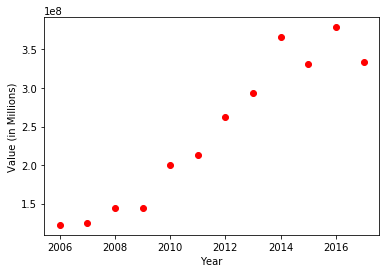

In [295]:
## write your code below; use more cells as needed
## -------------------------------------------------

fig, ax = plt.subplots(1)
ax.scatter(df_6a.loc[:,"Year"],df_6a.loc[:,"Total Value"], color = "red")
ax.set_xlabel("Year")
ax.set_ylabel("Value (in Millions)")


# You may need the lines below. Comment-out as you see fit.
# ax.set_ylabel("Value (in Millions)")
# ax.set_xlabel("Year")



**6b)**

Create a quick and dirty bar plot showing both Residential Value and Non-Residential Value throughout the years for the whole of the PHILIPPINES stacked together in one bar per year (a.k.a. "stacked bar"). No need to format the numbers, but go ahead if you want to.

*Hint:* draw two sets of bars, the second one with a **bottom** parameter pointing to the height of the first one.


**(15 points)**

In [296]:
## write your code below; use more cells as needed
## -------------------------------------------------


df_6b = df_main.loc[(df_main.loc[:, "Period"]=="Annual") & (df_main.loc[:, "Geolocation"]=="PHILIPPINES") ,["Year","Period","Geolocation","Residential Value", "Non-residential Value"]]
df_6b



,Year,Period,Geolocation,Residential Value,Non-residential Value
0,2017,Annual,PHILIPPINES,164153250,143315470
95,2016,Annual,PHILIPPINES,187599731,162517347
190,2015,Annual,PHILIPPINES,160065906,143221467
285,2014,Annual,PHILIPPINES,152755734,184873176
380,2013,Annual,PHILIPPINES,133783612,135163094
475,2012,Annual,PHILIPPINES,125864536,112083457
570,2011,Annual,PHILIPPINES,100220969,89952721
665,2010,Annual,PHILIPPINES,102943619,82722312
760,2009,Annual,PHILIPPINES,80108885,51295024
855,2008,Annual,PHILIPPINES,74892765,55930704


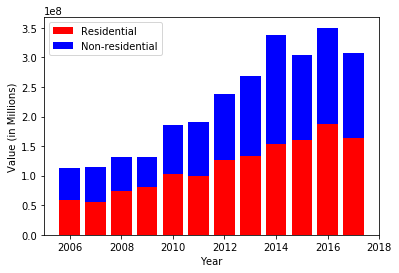

In [297]:
## write your code below; use more cells as needed
## -------------------------------------------------


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.bar(df_6b.loc[:,"Year"],df_6b.loc[:,"Residential Value"], color = "red", label = "Residential")
ax.bar(df_6b.loc[:,"Year"],df_6b.loc[:,"Non-residential Value"],bottom = df_6b.loc[:,"Residential Value"], color = "blue", label = "Non-residential")
ax.set_xlabel("Year")
ax.set_ylabel("Value (in Millions)")
ax.legend()


# You may need the lines below. Comment-out as you see fit.
# ax.set_ylabel("Value (in Millions)")
# ax.set_xlabel("Year")



**6c)**

Create quick and dirty bar plot showing Total Value for 2017 across Regions, sorted by Total Value in descending order. No need to format the numbers, but you can if you'd like.

Note that all rows except those with PHILIPPINES are for regions, so simply omit the rows with PHILIPPINES.

Also note that Year is now numeric.

**(10 points)**

In [298]:
## write your code below
df_6c = df_main.loc[(df_main.loc[:, "Year"]==2017) & (df_main.loc[:, "Geolocation"]!="PHILIPPINES") & (df_main.loc[:, "Period"] == "Annual")  ,["Year","Period","Geolocation","Total Value"]]
df_6c = df_6c.sort_values(by = "Total Value", ascending = False)
df_6c


,Year,Period,Geolocation,Total Value
1,2017,Annual,National Capital Region (NCR),101147791
6,2017,Annual,Region IV-A (CALABARZON),61631254
5,2017,Annual,Region III (Central Luzon),33433864
10,2017,Annual,Region VII (Central Visayas),31738186
9,2017,Annual,Region VI (Western Visayas),21174959
14,2017,Annual,Region XI (Davao Region),19498862
3,2017,Annual,Region I (Ilocos Region),12913225
11,2017,Annual,Region VIII (Eastern Visayas),8947746
13,2017,Annual,Region X (Northern Mindanao),8580818
15,2017,Annual,Region XII (SOCCSKSARGEN),6514975


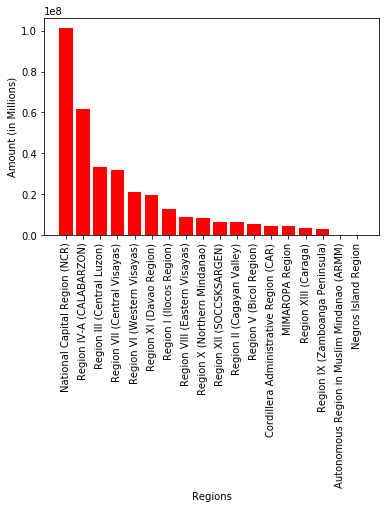

In [299]:

fig, ax = plt.subplots(1)
ax.bar(df_6c.loc[:,"Geolocation"],df_6c.loc[:,"Total Value"], color = "red")
ax.set_ylabel("Amount (in Millions)")
ax.set_xlabel("Regions")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# comment this out later. you will need it.
# thank me later.
# ax.set_ylabel("Amount (in Millions)")
# ax.set_xlabel("Regions")
# for tick in ax.get_xticklabels():
#    tick.set_rotation(90)